In [213]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [214]:
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [215]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Tue, 01 Oct 2019 14:37


In [216]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format

# Traffic Counts
----
### By Facility Type

In [217]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [218]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.ix['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
display(_df)

,observed,modeled,diff
@facilitytype,,,
Freeway,"18,913,757","17,050,123","-1,863,634"
HOV,"12,100,909","9,983,011","-2,117,898"
Prinicpal Arterial,"139,789","140,709",920
Ramp,"121,917","173,284","51,367"
Total,"31,276,372","27,347,127","-3,929,245"


----
### By County

In [219]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('@countyid').sum()[['observed','modeled']]
_df.ix['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df

,observed,modeled,diff
@countyid,,,
33,"22,997,770","19,379,195","-3,618,575"
53,"3,240,267","3,651,738","411,471"
61,"5,038,335","4,316,194","-722,141"
Total,"31,276,372","27,347,127","-3,929,245"


----
### Scatterplots 

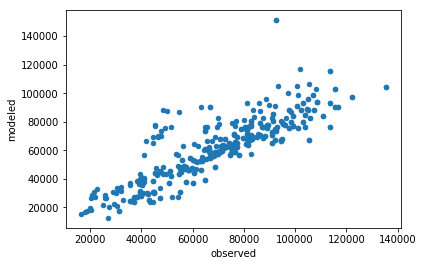

In [220]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df.plot(kind='scatter', x='observed', y='modeled')

---
By County

**Double-click on plots to expand. Double-click again to shrink**

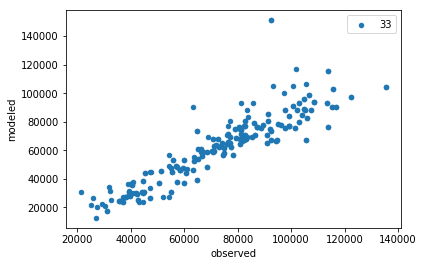

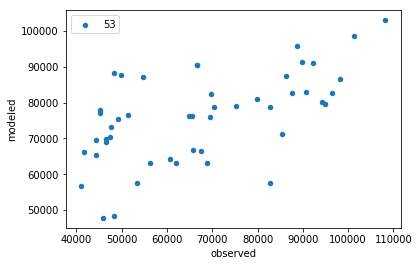

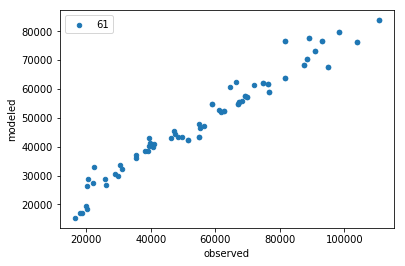

In [221]:
for county in np.unique(df['@countyid']):
    _df = df[df['@countyid'] == county]
    _df.plot(kind='scatter', x='observed', y='modeled', label=county)

---
By Facility Type

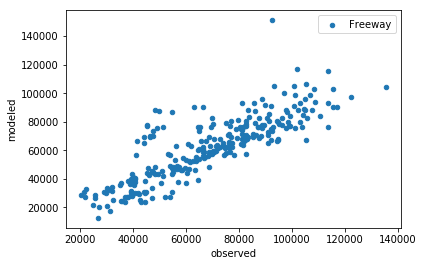

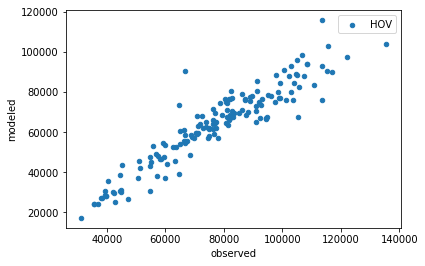

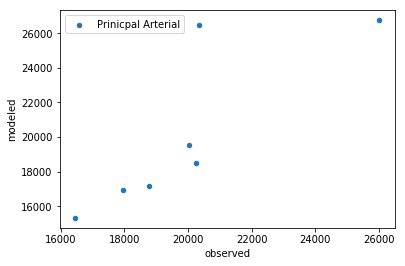

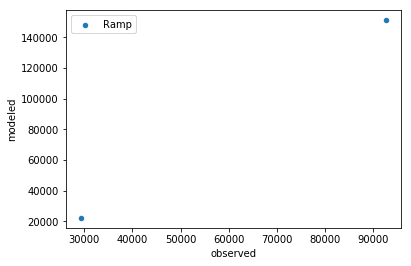

In [222]:
for factype in np.unique(df['@facilitytype']):
    _df = df[df['@facilitytype'] == factype]
    _df.plot(kind='scatter', x='observed', y='modeled', label=factype)

# Screenlines

In [229]:
df = pd.read_csv(r'C:\sc_2018_osm\outputs\network\network_results.csv')
_df_model = df.groupby('type').sum()[['@tveh']]
_df_obs = pd.read_csv(r'')

# Transit Boarding
----
### By Agency

In [223]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv', index_col='agency_name')
# df = pd.read_csv(r'C:\sc_2018_osm\outputs\validation\daily_boardings_by_agency.csv', index_col='agency_name')
df[['observed','modeled','diff']] = df[['observed','modeled','diff']].astype('float')
df.drop('perc_diff', axis=1, inplace=True)
df.sort_values('observed', ascending=False)

,observed,modeled,diff
agency_name,,,
King County Metro,"421,902","477,481","55,579"
Sound Transit,"159,193","125,613","-33,580"
Community Transit,"32,480","42,355","9,875"
Pierce Transit,"28,597","47,616","19,019"
Washington Ferries,"18,287","2,173","-16,114"
Kitsap Transit,"8,922","18,070","9,148"
Everett Transit,"3,558","3,169",-389


----
### Key Routes

In [224]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed','modeled']] = df[['observed','modeled']].astype('float')
df = df.drop('perc_diff',axis=1)
df.sort_values('observed', ascending=False)

,agency_name,observed,modeled,diff
description,,,,
LightRail SeaTac-Sea,Sound Transit,"77,498","38,661","-38,837"
E-Line E-Line Rapid*,King County Metro,"17,389","19,100","1,711"
COMMTR RL TAC-SEA,Sound Transit,"16,359","3,042","-13,317"
D Line D-Line Rapid*,King County Metro,"14,493","13,549",-944
40 CBD-NGTC via Fre*,King County Metro,"12,440","14,533","2,093"
C Line C-Line Rapid*,King County Metro,"12,429","13,480","1,051"
7 Route 7,King County Metro,"11,309","9,885","-1,424"
A Line A-Line Rapid*,King County Metro,"10,168","13,058","2,890"
550 Bellevue-Seattle,Sound Transit,"9,738","16,512","6,774"


---
### Lines by Agency
**Double-click on plots to expand. Double-click again to shrink**

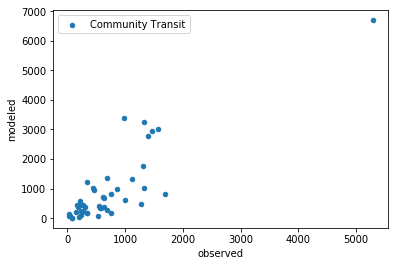

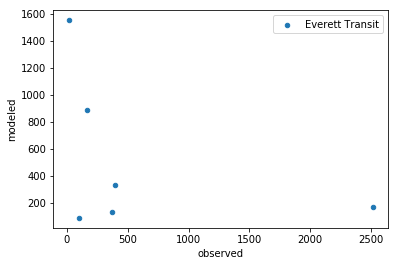

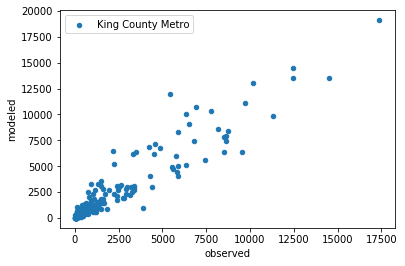

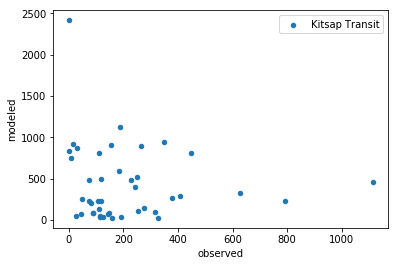

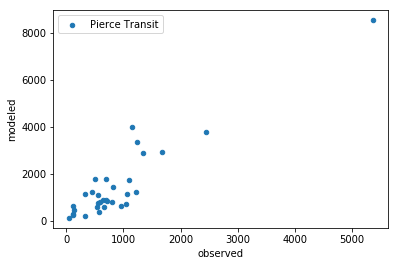

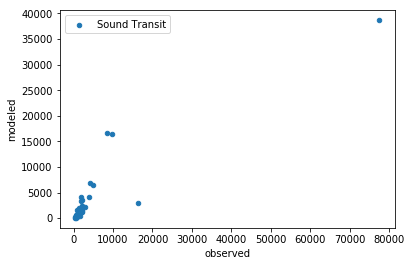

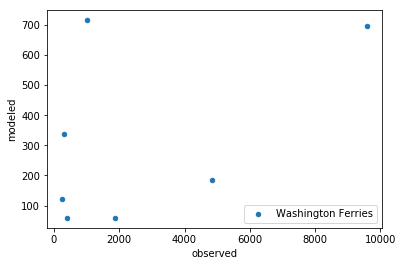

In [225]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency_name')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.ix[agency,:]
    _df.plot(kind='scatter', x='observed', y='modeled', label=agency)

# Light Rail Station Boardings